In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker

In [2]:
# import peaks data from ITC in response to pure tone 
peaks = np.load("/home/jeremy/Desktop/asymmetric-sampling-master/data/fig3/itc_peaks_by_roi.npz")

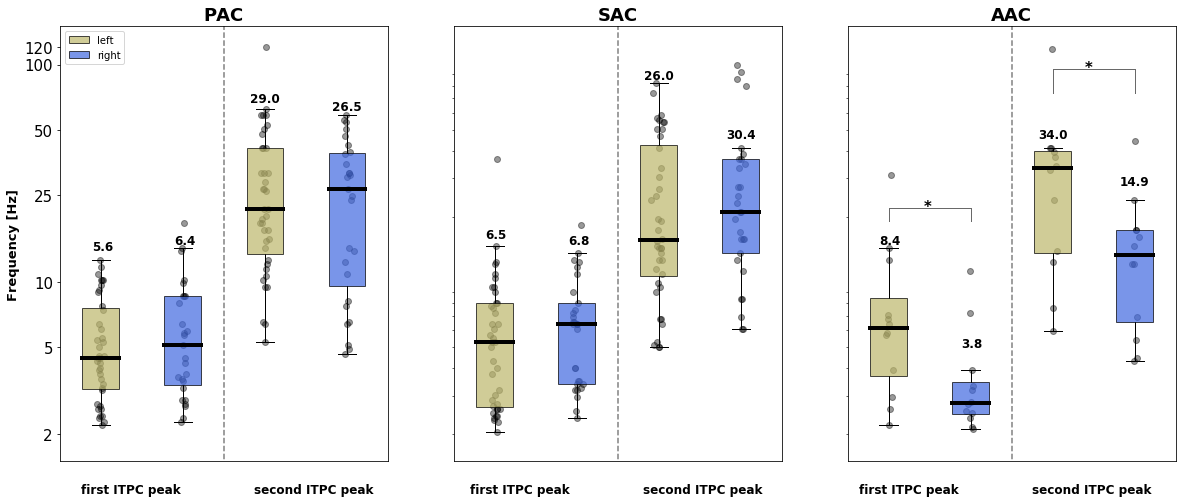

In [3]:
# make box plot for the three ROIs of the two ITC peaks 

pics = [[peaks['pac_one_l'],peaks['pac_one_r'],peaks['pac_two_l'],peaks['pac_two_r']],[peaks['sac_one_l'],peaks['sac_one_r'],peaks['sac_two_l'],peaks['sac_two_r']],
        [peaks['aac_one_l'],peaks['aac_one_r'],peaks['aac_two_l'],peaks['aac_two_r']]]                                                                                   
ticklabels = [['left_peak1', 'right_peak1', 'left_peak2','right_peak2'],[],[]]
names = ['PAC','SAC','AAC']

def jitter(x):
    return x + np.random.normal(0, 0.03,x.size)     

fig3, axs = plt.subplots(1, 3,figsize=(20,8))
for i, (ji, ax) in enumerate(zip(range(6),axs.ravel())):
    bp = ax.boxplot(pics[ji],patch_artist=True, showfliers=False, showmeans=True)
    colors = ['darkkhaki', 'royalblue', 'darkkhaki','royalblue']
    for i, (patch, color) in enumerate (zip(bp['boxes'], colors)):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    median1 = []
    for element in bp['medians']:
        element.set_color('k')
        element.set_linewidth(4)
    for element in bp['means']:
        element.set_markersize(0)
        median1.append(element.get_ydata())
    median1 = np.round(np.asarray(median1)[:,0],decimals=1)
    caps1 = []
    for element in bp['caps']:
        caps1.append(element.get_ydata())
    caps11 = np.asarray(caps1)[:,0][1::2]
    ax.set_ylim(1.5, 150)
    ax.yaxis.set_tick_params(labelsize = 15)
    ax.set_xticklabels([],rotation = 70)
    ax.set_yscale('log',basey=10)
    ax.vlines(2.5, 1, 150, colors = 'gray', linestyles = 'dashed', label = '')
    ax.set_title(names[ji],fontsize = 18, weight = 'bold')
    ax.set_yticks([])
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xticks([])
    number = [1,1,4,4]
    chiffres = [0.89, 1.89,2.82,3.82]
    for i,(med,cap,num,chi) in enumerate(zip(median1,caps11,number,chiffres)):
        ax.text(chi,int(np.round(cap)+num),str(np.round(med, decimals = 1)),fontsize = 12,weight = 'bold')
    rois = pics[ji]
    
    for num,items in enumerate(rois):
        xs = np.repeat(num +1 ,len(rois[num]))
        new = jitter(xs)
        ax.scatter(new,items,color = 'k',alpha = 0.4)
    
    if ji == 0 :
        ax.legend([bp["boxes"][0],bp["boxes"][1]], ['left', 'right'], loc = 'upper left')
        ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
        ax.yaxis.set_minor_formatter(ticker.NullFormatter())
        ax.yaxis.set_minor_locator(ticker.NullLocator())
        tick_vals = np.array([2,5,10,25,50,100,120]).astype(int)
        ax.set_yticks(tick_vals)
        ax.set_ylabel('Frequency [Hz]',fontsize = 13,weight = 'bold')
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    
    if ji == 2:
        plt.plot([1, 2], [22, 22], 'dimgrey', lw = 1)
        plt.plot([1, 1], [19, 22], 'dimgrey', lw = 1)
        plt.plot([2, 2], [19, 22], 'dimgrey', lw = 1)

fig3.text(0.725, 0.56, '*', color = 'k',  weight = 'bold', fontsize = 15)
plt.plot([3, 4], [95, 95], 'dimgrey', lw = 1)
plt.plot([4, 4], [74, 95], 'dimgrey', lw = 1)
plt.plot([3, 3], [74, 95], 'dimgrey', lw = 1)
fig3.text(0.837, 0.8, '*', color = 'k',
         weight = 'bold', fontsize = 15)        
fig3.text(0.41,0.07,'first ITPC peak', fontsize=12,weight = 'bold')
fig3.text(0.14,0.07,'first ITPC peak', fontsize=12,weight = 'bold')
fig3.text(0.68,0.07,'first ITPC peak', fontsize=12,weight = 'bold')
fig3.text(0.53,0.07,'second ITPC peak', fontsize=12,weight = 'bold')
fig3.text(0.26,0.07,'second ITPC peak', fontsize=12,weight = 'bold')
fig3.text(0.8,0.07,'second ITPC peak', fontsize=12,weight = 'bold');

